In [46]:
import matplotlib.pyplot as plt
from skimage.data import camera
from skimage.transform import resize
from bayes_mef import BayesianMEF
import numpy as np

### Ground Truth

(170, 170)

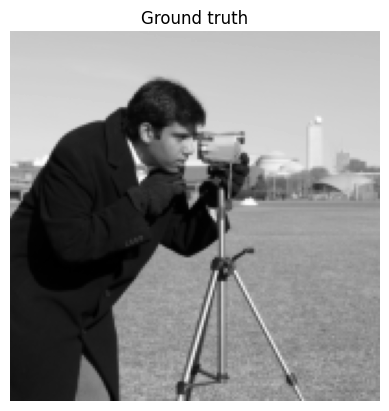

In [68]:
image = camera()
truth = (
    resize(image, (image.shape[0] // 3, image.shape[1] // 3), anti_aliasing=True) * 1e3
)

plt.imshow(truth, cmap="gray")
plt.axis("off")
plt.title("Ground truth")

truth.shape

## Simulate data

In [93]:
background = 60  # some background
times = np.array([0.1, 1, 10])  # exposure times or equivalently flux factors

# poisson data based on image formation model
fusion_times = np.repeat(times, 6)
data = [np.random.poisson(time * truth + background) for time in fusion_times]

# data is overexposed due to limited detector range
threshold = 1500
data_saturated = np.clip(data, None, threshold, dtype="float")

### Show overexposed data with mask

190.0
1123.0
1500.0


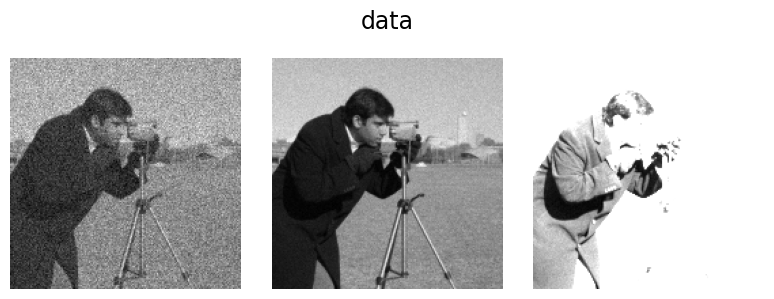

In [94]:
# show underexposed to overexposed data
fig, axes = plt.subplots(1, 3, figsize=(8, 3))
for ax, im in zip(axes, data_saturated[::6]):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    print(im.max())
fig.suptitle("data", fontsize=17)
fig.tight_layout()

## Bayesian MEF

In [95]:
# Bayesian MEF with optional field `update_fluxes`. Set it to `True` when
# flux factors (exposure times) are not accurately known.
mef_em = BayesianMEF(data_saturated, threshold, fusion_times, update_fluxes=False)
mef_em.run(n_iter=100)
fused_im = mef_em.fused_image.copy()

Text(0.5, 1.0, 'HDR image')

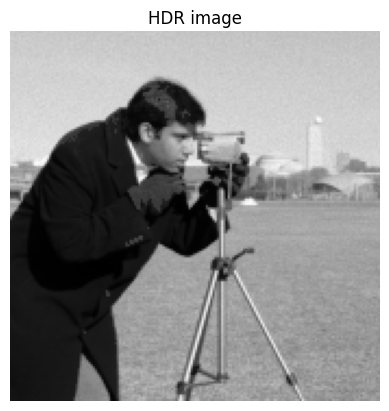

In [96]:
# recovered HDR image
plt.imshow(fused_im, cmap="gray")
plt.axis("off")
plt.title("HDR image")